# Car Classification -- Use Paddle For Inference (Model exported from fastai and converted by x2paddle)

## Basic imports

In [1]:
import paddle
import paddle.fluid as fluid
from PIL import Image
from paddle.vision.transforms import functional as F
import numpy as np
import json

## Read Labels <=> integers Map

In [2]:
with open("models-linux/car_classification_model.labels") as f:
    label2num = json.load(f)
num2label = { label2num[k]:k for k in label2num }

## Read Image using PIL

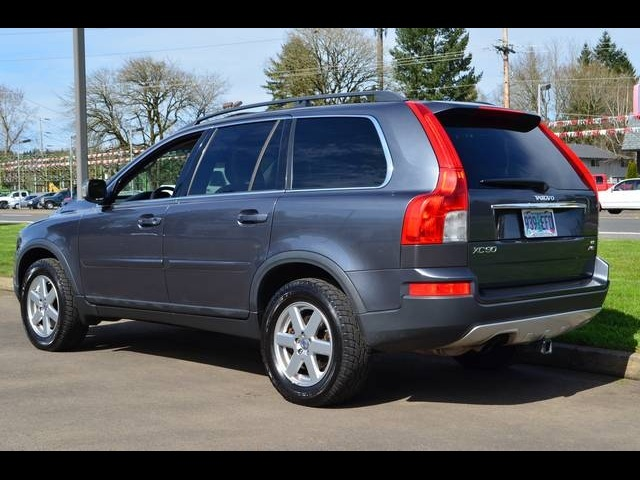

In [3]:
raw_img = Image.open("example_images/00028.jpg")
raw_img

## Convert the image to input format ([1,3,224,224] float32 Tensor)

In [4]:
img = np.transpose(np.array(raw_img.resize((224,224)), dtype="float32"),(2,0,1))[np.newaxis,:]/255
paddle.disable_static()
imgtt = paddle.to_tensor(img).astype("float32")

## Create executor and load the model

In [5]:
exe = paddle.static.Executor(paddle.CPUPlace())
paddle.enable_static()
[prog, inputs, outputs] = paddle.static.load_inference_model(path_prefix="models/car_classification_pd_model/inference_model", 
                                                            executor=exe, 
                                                            model_filename="model.pdmodel",
                                                            params_filename="model.pdiparams")

2021-08-22 11:33:11,518-WARNING: The old way to load inference model is deprecated. model path: d:\BigHomework\2020-2021-3\Workspace\models\pd_model\inference_model\model.pdmodel, params path: d:\BigHomework\2020-2021-3\Workspace\models\pd_model\inference_model\model.pdiparams


## Run the inference program and get the result

In [6]:
result = exe.run(prog, feed={inputs[0]: np.array(imgtt)}, fetch_list=outputs)
max_index = np.argmax(result)
print(f"Result: {num2label[max_index]} , Value:  {np.max(result)}")

Result: SUV , Value:  0.6413090825080872
